In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
# Read the CSV file into a Pandas DataFrame

df = pd.read_csv('./df_int.csv')
df.head()

,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Stressful day Total,Drank coffee Total,Drank tea Total,Ate late Total,Worked out Total,Fell asleep
0,89,530,0,65,0,0,1,1,0,0,2238
1,100,512,1,59,0,0,0,0,0,0,2257
2,87,442,1,60,0,0,0,1,0,0,2132
3,93,483,1,62,0,1,1,1,0,0,13
4,74,424,1,60,0,0,1,0,0,0,2216


In [20]:
df

,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Stressful day Total,Drank coffee Total,Drank tea Total,Ate late Total,Worked out Total,Fell asleep
0,89,530,0,65,0,0,1,1,0,0,2238
1,100,512,1,59,0,0,0,0,0,0,2257
2,87,442,1,60,0,0,0,1,0,0,2132
3,93,483,1,62,0,1,1,1,0,0,13
4,74,424,1,60,0,0,1,0,0,0,2216
...,...,...,...,...,...,...,...,...,...,...,...
157,69,511,1,74,0,0,1,0,0,0,2138
158,83,450,1,52,0,0,1,1,1,0,2159
159,60,442,1,56,0,0,1,1,0,1,2257
160,72,493,1,62,0,0,1,1,0,0,2217


In [21]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this
X = df.copy()
X = X.drop(columns=["Wake up"], axis=1)
X = X["Time in bed"].values.reshape(-1, 1)
y = df["Wake up"].values.reshape(-1, 1)


print("Shape: ", X.shape, y.shape)

Shape:  (162, 1) (162, 1)


In [22]:
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

loans_data_scaled = data_scaler.fit_transform(X, y)
loans_data_scaled[:5]


array([[ 1.04292204],
       [ 0.78429795],
       [-0.2214624 ],
       [ 0.36762581],
       [-0.48008649]])

In [23]:

print("Shape: ", X.shape, y.shape)

Shape:  (162, 1) (162, 1)


Text(0, 0.5, 'Wake up')

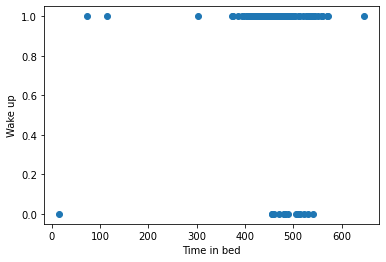

In [24]:
# Plot the data to find out if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Time in bed")
plt.ylabel("Wake up")
### END SOLUTION

In [25]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [26]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [27]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression()

In [28]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### END SOLUTION

mean squared error (MSE): 0.1323260733378659
R-squared (R2): -0.059238710861678756


In [29]:
# Call the `score()` method on the model to show the R2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

-0.059238710861678756